#***Import Libraries***

In [ ]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

from prettytable import PrettyTable
from astropy.table import Table, Column

In [ ]:
sample_data = pd.read_csv("creditcard.csv")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data.head(10))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 

In [ ]:
sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [ ]:
sample_data.shape

(3973, 31)

In [ ]:
sample_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
sample_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,-0.057106,0.133674,0.286627,-0.146138,-0.096092,0.283778,-0.145560,-0.098660,-0.119510,0.031412,0.060170,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,0.992945,1.001567,0.657176,0.914765,0.758476,0.884615,0.775902,0.700202,0.742928,0.777057,0.581657,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,-6.042641,-2.595325,-2.899907,-3.389510,-6.576789,-3.618060,-3.950311,-5.400014,-3.890140,-3.718810,-11.748689,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,-0.549737,-0.601242,-0.131506,-0.761978,-0.377547,-0.276467,-0.645907,-0.537929,-0.521466,-0.442986,-0.128533,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,-0.141159,0.015912,0.304906,-0.120527,0.014078,0.387009,-0.085874,-0.165280,-0.099280,0.027502,0.008539,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,0.290839,0.965016,0.738858,0.490290,0.327924,0.929474,0.397888,0.246711,0.295036,0.501621,0.168245,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,11.906868,3.702177,3.774837,3.182541,4.197010,3.635042,4.087802,4.072972,2.950374,3.097749,7.744222,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


#***Visualization***

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

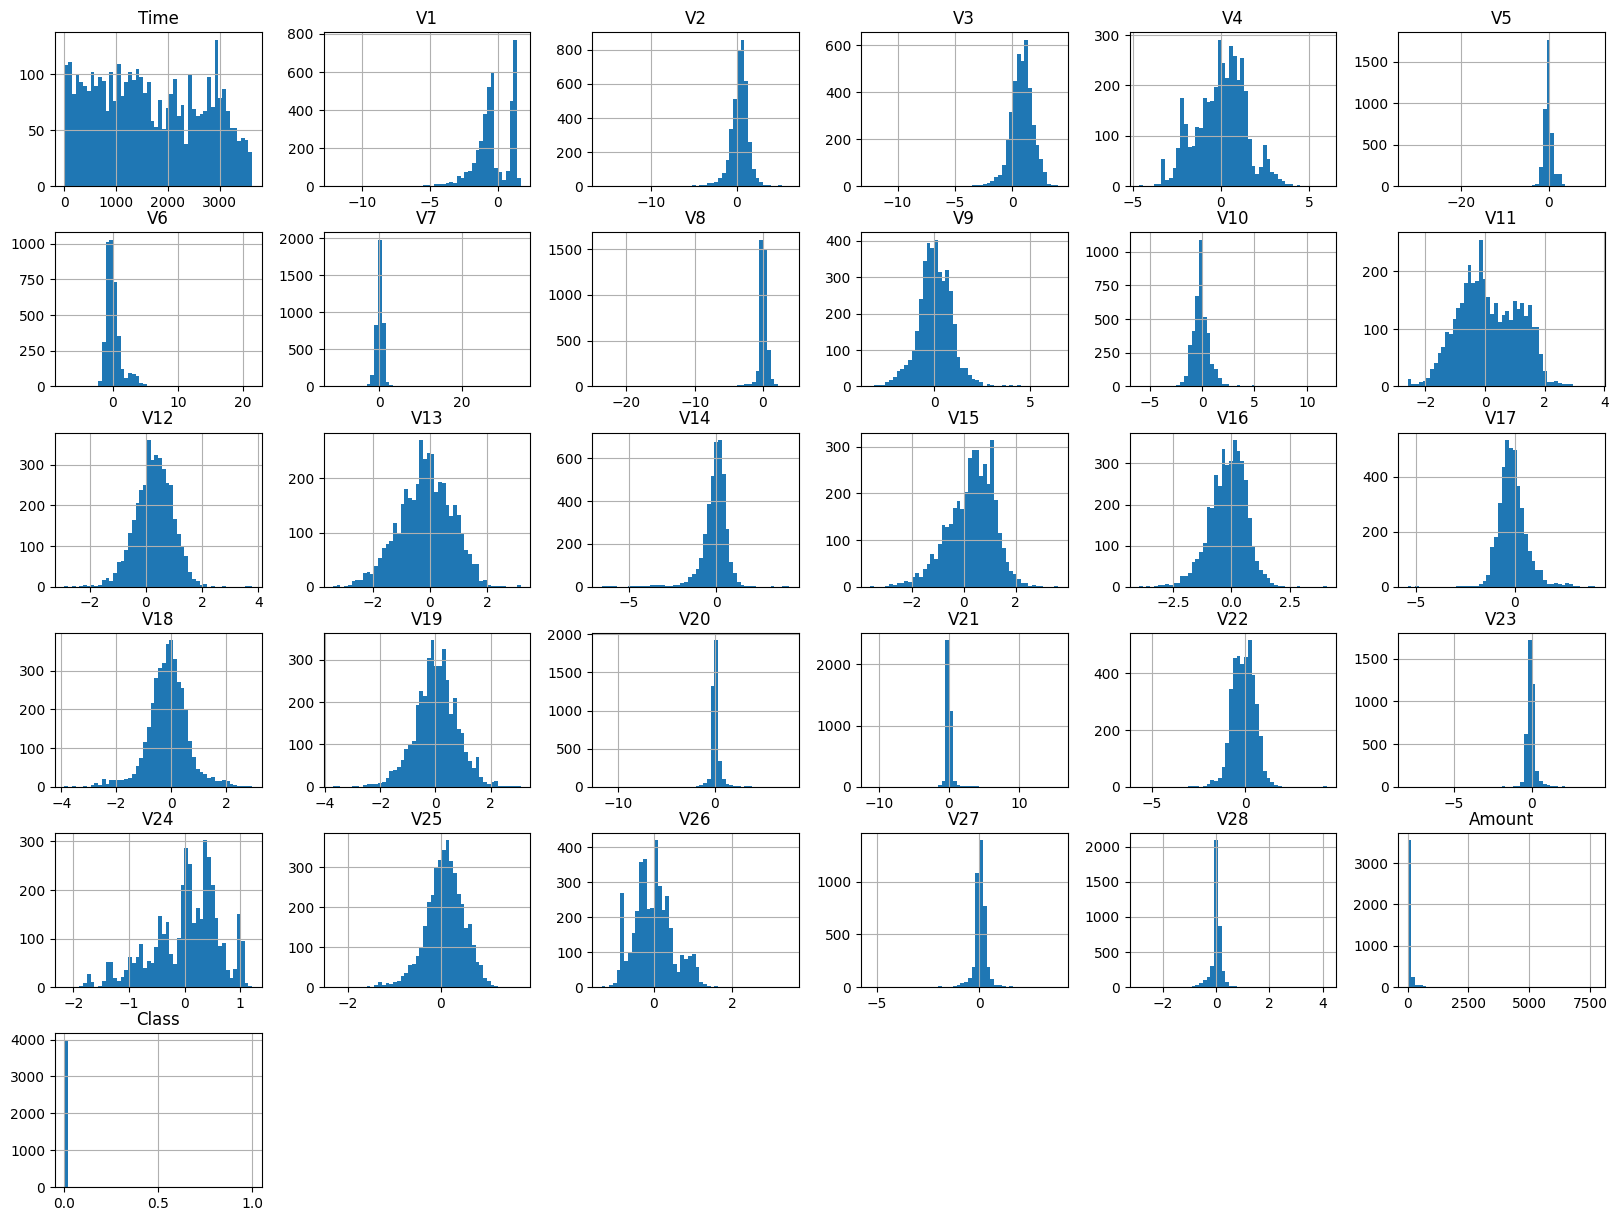

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sample_data.hist(bins=50,figsize=(20,15))

In [ ]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)





Attributes in Sample Data:

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
sample_data["V23"].fillna(sample_data["V23"].median(),inplace=True)
sample_data["V24"].fillna(sample_data["V24"].median(),inplace=True)
sample_data["V25"].fillna(sample_data["V25"].median(),inplace=True)
sample_data["V26"].fillna(sample_data["V26"].median(),inplace=True)
sample_data["V27"].fillna(sample_data["V27"].median(),inplace=True)
sample_data["V28"].fillna(sample_data["V28"].median(),inplace=True)
sample_data["Amount"].fillna(sample_data["Amount"].median(),inplace=True)
sample_data["Class"].fillna(sample_data["Class"].median(),inplace=True)


In [ ]:
sample_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#***Features and Labels***

In [ ]:
Features=sample_data.drop('Class',axis=1)
Label=sample_data['Class'].copy()


#***Train Test Splitting***

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Features,Label,test_size=0.2,random_state=2)

#***Train The Model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, np.ravel(Y_train))
print(rf_model)


RandomForestClassifier(random_state=0)


#***Model Evaluate on Testing Data***

In [ ]:
model_predictions = rf_model.predict(X_test)

In [ ]:
print(model_predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#***Accuracy***

In [ ]:
# Calculate the Accuracy

model_accuracy_score = accuracy_score(Y_test,model_predictions)

print("\n\nAccuracy Score:")
print("===============\n")
print(round(model_accuracy_score,2))



Accuracy Score:

1.0


#***Application Phase***

In [ ]:
time = int(input("Time: "))

V1 = input("Enter V1: ")
V2 = input("Enter V2: ")
V3 = input("Enter V3: ")
V4 = input("Enter V4: ")
V5 = input("Enter V5: ")
V6 = input("Enter V6: ")
V7 = input("Enter V7: ")
V8 = input("Enter V8: ")
V9 = input("Enter V9: ")
V10 = input("Enter V10: ")
V11 = input("Enter V11: ")
V12= input("Enter V12: ")
V13 = input("Enter V13: ")
V14 = input("Enter V14: ")
V15 = input("Enter V15: ")
V16 = input("Enter V16: ")
V17 = input("Enter V17: ")
V18 = input("Enter V18: ")
V19 = input("Enter V19: ")
V20 = input("Enter V20: ")
V21 = input("Enter V21: ")
V22 = input("Enter V22: ")
V23 = input("Enter V23: ")
V24 = input("Enter V24: ")
V25 = input("Enter V25: ")
V26 = input("Enter V26: ")
V27 = input("Enter V27: ")
V28 = input("Enter V28: ")
Amount = input("Enter Amount: ")




Time: 1
Enter V1: 0.6
Enter V2: 0.6
Enter V3: 0.3
Enter V4: 0.8
Enter V5: 0.4
Enter V6: 1
Enter V7: 2
Enter V8: 0.6
Enter V9: 0.4
Enter V10: 0.9
Enter V11: 0.4
Enter V12: 1
Enter V13: 2
Enter V14: 0.6
Enter V15: 0.7
Enter V16: 0.3
Enter V17: 0.9
Enter V18: 0
Enter V19: 0.56
Enter V20: 0.787
Enter V21: 0.567
Enter V22: 0
Enter V23: 0
Enter V24: 7
Enter V25: 45
Enter V26: 0.7
Enter V27: 0.8
Enter V28: 0.4
Enter Amount: 567


In [ ]:
data = {'Time': [time], 'V1': [V1], 'V2': [V2], 'V3': [V3], 'V4': [V4], 'V5': [V5],
        'V6': [V6], 'V7': [V7], 'V8': [V8], 'V9': [V9], 'V10': [V10], 'V11': [V11],
        'V12': [V12], 'V13': [V13], 'V14': [V14], 'V15': [V15], 'V16': [V16], 'V17': [V17],
        'V18': [V18], 'V19': [V19], 'V20': [V20], 'V21': [V21], 'V22': [V22], 'V23': [V23],
        'V24': [V24], 'V25': [V25], 'V26': [V26], 'V27': [V27], 'V28': [V28], 'Amount': [Amount]}

df = pd.DataFrame(data)

# Print the resulting DataFrame
print(df)

   Time   V1   V2   V3   V4   V5 V6 V7   V8   V9  V10  V11 V12 V13  V14  V15  \
0     1  0.6  0.6  0.3  0.8  0.4  1  2  0.6  0.4  0.9  0.4   1   2  0.6  0.7   

   V16  V17 V18   V19    V20    V21 V22 V23 V24 V25  V26  V27  V28 Amount  
0  0.3  0.9   0  0.56  0.787  0.567   0   0   7  45  0.7  0.8  0.4    567  


In [ ]:

df = df.apply(pd.to_numeric, errors='coerce')


predictions = rf_model.predict(df)


In [ ]:
if(predictions == 0):
    prediction = "Fraud Found"
if(predictions == 1):
    prediction = "Fraud not Found"

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Prediction **       ",[prediction])
print(pretty_table)

+--------------------------------+
|        ** Prediction **        |
+--------------------------------+
|          Fraud Found           |
+--------------------------------+
